As usual, grab the data. The difference this time is that are only going to grab two of the features in order to make it a 2D problem which is easier to visualise.

In [1]:
from pandas import DataFrame
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X = DataFrame(load_iris().data, columns=load_iris().feature_names)
X = X[["sepal length (cm)", "sepal width (cm)"]]  # Grab just two of the features
y = load_iris().target

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

We will look at values of `n_neighbors` from 0 to 59.

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

hyperparameters = {
    "n_neighbors" : range(1, 40),
}
clf = GridSearchCV(KNeighborsClassifier(), hyperparameters).fit(train_X, train_y)

To easily look at the results, we put the output into a `DataFrame`, sort it by the test score (how well that value did against its validation set) and grab the top few rows.

In [3]:
cv_results = DataFrame(clf.cv_results_)
cv_results = cv_results.sort_values(["rank_test_score", "mean_test_score"])
cv_results.head()[["param_n_neighbors", "mean_test_score", "std_test_score", "rank_test_score"]]

param_n_neighbors  mean_test_score  std_test_score  rank_test_score
30                 31         0.795652        0.056227                1
28                 29         0.795257        0.042471                2
17                 18         0.786561        0.048231                3
27                 28         0.786561        0.048231                3
29                 30         0.786561        0.048231                3

It looks like the best one is `n_neighbors=31` but let's look on a plot to see how it varies:

<Axes: xlabel='param_n_neighbors', ylabel='mean_test_score'>

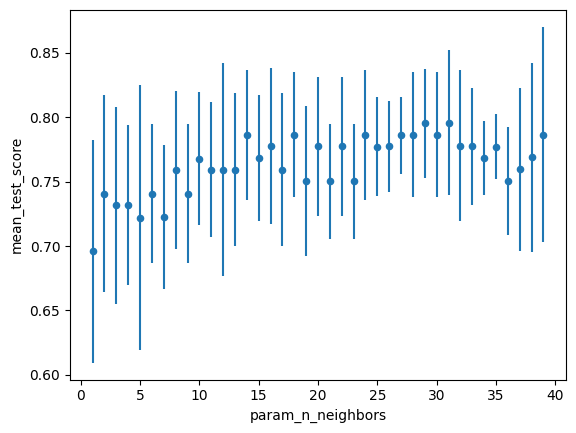

In [4]:
cv_results.plot.scatter("param_n_neighbors", "mean_test_score", yerr="std_test_score")

Indeed `n_neighbors=31` is the best in the range but they all have large standard deviations. It's worth plotting it like this so that you might want to pick a lower mean in order to get a tighter distribution.

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

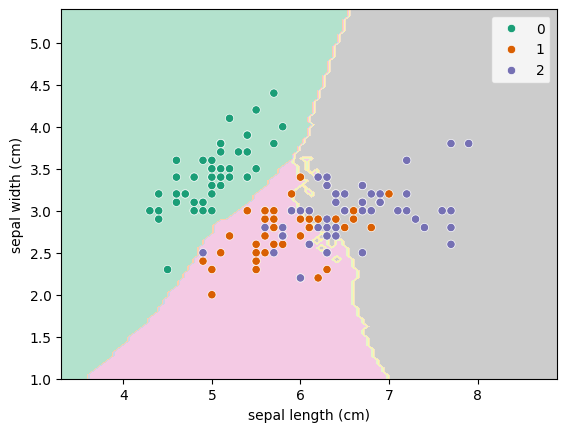

In [5]:
from sklearn.inspection import DecisionBoundaryDisplay
import seaborn as sns

DecisionBoundaryDisplay.from_estimator(clf, X, cmap="Pastel2")
sns.scatterplot(data=X, x="sepal length (cm)", y="sepal width (cm)", hue=y, palette="Dark2")

In [6]:
clf.score(test_X, test_y)

0.868421052631579